In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import copy
import tqdm
import pickle
# import files from above directory
plt.style.use('dark_background')
import os
import sys
import importlib  
import seqm

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    # make sure it is added on top to load first in 
    # case there is name conflict with the py files
    sys.path.insert(0,parent_dir)
try:
    importlib.reload(models)
    importlib.reload(bt2)
except NameError:
    import models
    import bt3

In [2]:
# generate data
def generate_lr(n=1000,a=0,b=0.1,start_date='2000-01-01'):
    x=np.random.normal(0,0.01,n)
    a=0
    b=0.1
    y=a+b*x+np.random.normal(0,0.01,n)
    dates=pd.date_range(start_date,periods=n,freq='B')
    data=pd.DataFrame(np.hstack((y[:,None],x[:,None])),columns=['y1','x1'],index=dates)
    return data


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.77it/s]


['Dataset 1', 'Dataset 2', 'Dataset 3']
-> REJECT STRATEGY

** Performance summary **

Return:  0.0004314373828286813
Standard deviation:  0.004997993525668107
Sharpe:  0.08632211718821882

Return fee=0.0:  0.0004314373828286813
Standard deviation fee=0.0:  0.004997993525668107
Sharpe fee=0.0:  0.08632211718821882

Return fee=0.001:  5.8877531480444045e-05
Standard deviation fee=0.001:  0.004969140887295471
Sharpe fee=0.001:  0.011848633962256003

**


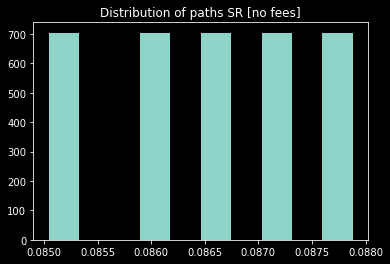

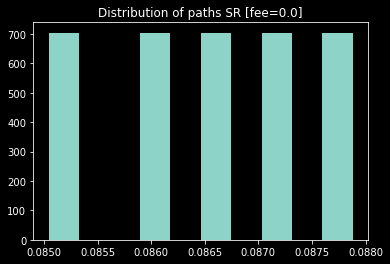

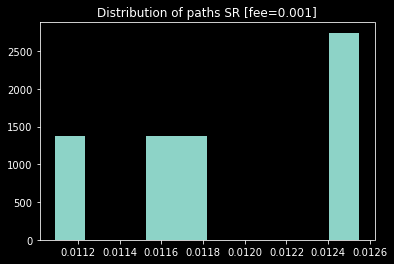

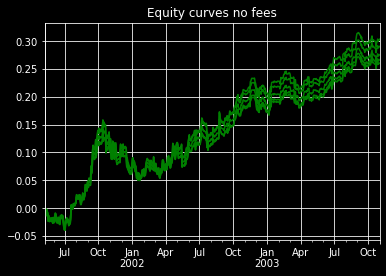

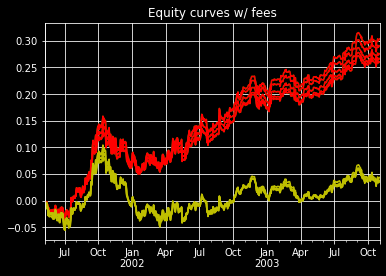

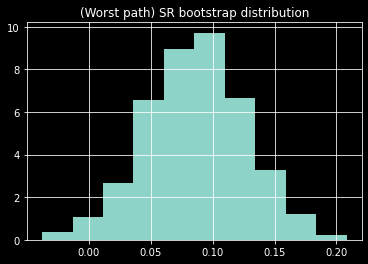

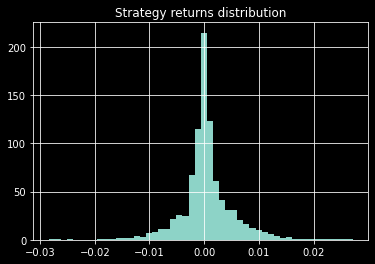

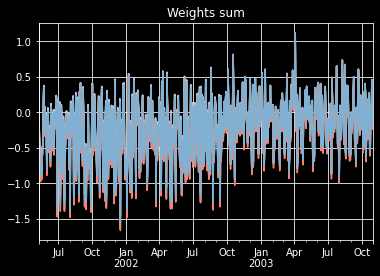

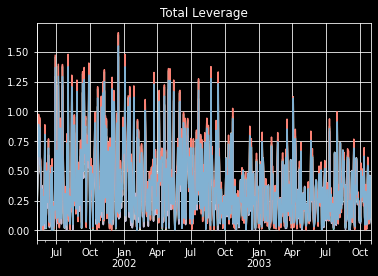

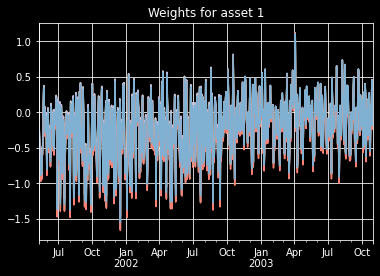

-> ACCEPT STRATEGY

** Performance summary **

Return:  0.0003432963503927479
Standard deviation:  0.003509988786793518
Sharpe:  0.09780554048617335


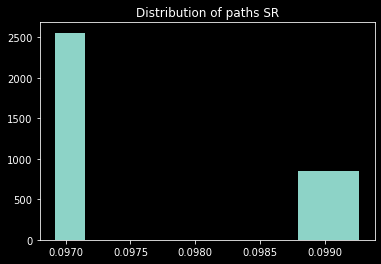

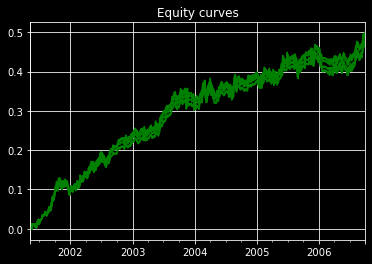

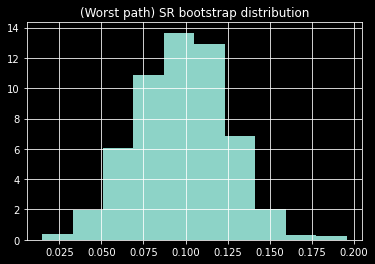

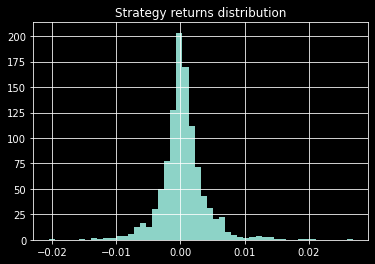

In [5]:
data1=generate_lr(n=1000,a=0,b=0.1,start_date='2000-01-01')
data2=generate_lr(n=700,a=0,b=0.1,start_date='2000-06-01')
data3=generate_lr(n=1500,a=0,b=0.1,start_date='2001-01-01')
model=models.ConditionalGaussian(n_gibbs=None,kelly_std=3,max_w=100)
data_lst=[data1,data2,data3]
data=seqm.bt3.Data(data_lst)
cvbt_out=seqm.bt3.cvbt(data,model,seq_path=True,k_folds=5)    
cvbt_out.view_names()
cvbt_out.post_process(pct_fees=[0,0.001],name='Dataset 1')
cvbt_out.portfolio_post_process(pct_fees=[0])